In [1]:
from FISHscale.utils.dataset import Dataset
from skimage import img_as_bool
from skimage.transform import rescale
import numpy as np
import matplotlib
from skimage import util
import zarr
%load_ext autoreload
%autoreload 2

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> int:
/home/alej

In [2]:
cluster_colors_GBM = {
    'AC-like 1':'#2ecc71',#inchworm B4FF9F
    'AC-like 2':'#2ecc71',#inchworm B4FF9F
    'AC-like 3':'#2ecc71',#inchworm B4FF9F
    'AC-like 5':'#2ecc71',#inchworm B4FF9F
    'AC-like 6':'#2ecc71',#inchworm B4FF9F
    'AC-like 7':'#2ecc71',#inchworm B4FF9F
    'AC-like 8':'#2ecc71',#inchworm B4FF9F

    'preOPC-like 1':'#7befb2',#'#c2f970'
    
    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 4': '#CA90C5',
    'GW-like 7': '#D873B6',
    'GW-like 8': '#C50F53',
    'GW-like 6': '#840034',

    
    'nIPC-like 1':'#FFF192',
    'nIPC-like 2':'#FFF192',
    'nIPC-like 3':'#FFF192',
    
    'RG-like':'#ff9470',
    'nIPC-RG-like':'#ff9470',
    
    'OPC-like 1':'#89c4f4', #bright turquoise
    'OPC-like 2':'#89c4f4', #bright turquoise
    
    'Endothelial':'#d5b8ff', #mauve
    'Endothelial 1':'#d5b8ff', #mauve
    'Mural cell': '#8c14fc',  #electric indigo
    'Mural cell 2': '#8c14fc',  #electric indigo
    'Mural': '#8c14fc',  #electric indigo
    
    'FB-like 1': '#FF6EC7', #fff9de
    'FB-like 2': '#FF6EC7', #fff9de
    'FB-like 3': '#FF6EC7', #fff9de
    
    'Mono 1': '#FBFCFA',#'#c8f7c5',#'#e6d9cb',#'#cdd1e4',#'#f4ede4',
    'Mono 2': '#FBFCFA',
    
    'TAM-BDM 1':'#e88474',#'#F5C9B0',
    'TAM-BDM 2':'#A94A54',
    
    'TAM-BDM 3':'#DC9D57',    #'#89c4f4',#'#95a5a6',#'#ecd9dd',
    'TAM-BDM 4':'#DC9D57',#'#A5765C',
    
    'TAM-MG':'#825e5c', #'#00b5cc' (blue),
    
    'DC': '#a6915c',

}

gliosarcoma_palette = {
    'RG 1': '#93faa5',
    'RG 2': '#93faa5',
    'RG 3': '#93faa5',
    
    
    'FB-like 3': '#89c4f4',#'#FF6EC7',
    'FB-like 1': '#89c4f4',#'#FF6EC7',
        

    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 4': '#CA90C5',
    'GW-like 7': '#D873B6',

    'GW-like 8': '#C50F53',
    'GW-like 6': '#d2527f',

    'Endothelial 1': '#8c14fc',
    
    'AC-like 1':'#f2784b', #'#ffffcc',
    'AC-like 2':'#f2784b', #'#ffffcc',
    'AC-like 4':'#f2784b', #'#ffffcc',
    'AC-like 5':'#f2784b', #'#ffffcc',
    'AC-like 6':'#f2784b', #'#ffffcc',
    
}

In [3]:
DS = Dataset('/wsfish/glioblastoma/EEL/Phase1/Analysis/JJEXP20220128_EEL_SL016A_S1/JJEXP20220128_EEL_SL016A_S1_RNA_transformed_assigned.parquet',
             gene_label='decoded_genes',
             pixel_size='0.27 micrometers',
             reparse=True,
            )

'''DS.color_dict['VEGFA'] = np.array((227, 61, 148)) / 255
DS.color_dict['FTL'] = np.array((255, 255, 204)) / 255
DS.color_dict['IGFBP5'] = np.array((210, 77, 87)) / 255'''


100%|███████████████████████████████████████████████████████████████████████████| 890/890 [00:07<00:00, 122.15it/s]


    Loaded: JJEXP20220128_EEL_SL016A_S1_RNA_transformed_assigned


"DS.color_dict['VEGFA'] = np.array((227, 61, 148)) / 255\nDS.color_dict['FTL'] = np.array((255, 255, 204)) / 255\nDS.color_dict['IGFBP5'] = np.array((210, 77, 87)) / 255"

In [4]:
DS.color_dict['EGFR'] = matplotlib.colors.to_rgb(cluster_colors_GBM['preOPC-like 1'])
DS.color_dict['GFAP'] = matplotlib.colors.to_rgb('#93faa5')
DS.color_dict['COL1A1'] = matplotlib.colors.to_rgb('#89c4f4')
DS.color_dict['RGCC'] = matplotlib.colors.to_rgb('#f1e7fe')

DS.color_dict['FN1'] = matplotlib.colors.to_rgb('#d5b8ff')
DS.color_dict['TNC'] = matplotlib.colors.to_rgb('#e33d94')
DS.color_dict['VEGFA'] = matplotlib.colors.to_rgb(gliosarcoma_palette['GW-like 6'])



In [5]:
img = zarr.load('/datc/sl/fish_rawdata/JJEXP20220128_EEL_SL016A_S1/fresh_tissue/segmentation/image_segmented_labels.zarr/segmented_labels_image/')
#img = np.flip(img, axis=0)
img[img >0] = 1
img_d = rescale(img, 0.27, anti_aliasing=False)
img_d[img_d >0] = 1
img_d = img_as_bool(img_d)
#x1, y1, x2, y2 = x1*0.27, y1*0.27, x2*0.27, y2*0.27

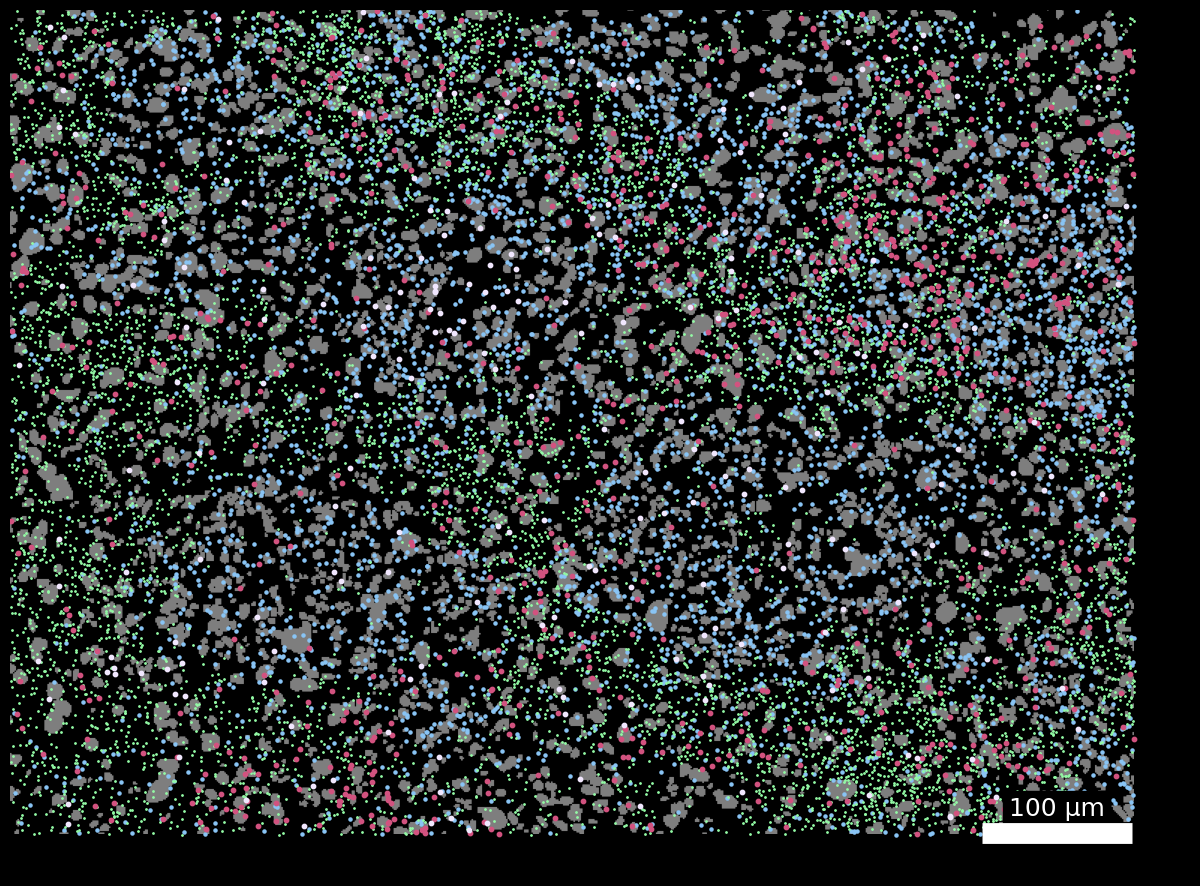

In [6]:
xlim = (9750, 10500)
ylim = (5000, 5550)

v =  [[xlim[0], ylim[0]],[xlim[1],ylim[1]]]

scale_factor = 1#0.27*4.5
img_zoom = img_d[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]

sizes = [5, 1, 10,10,] 
genes = ['COL1A1', 'GFAP', 'VEGFA', 'RGCC']
DS.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=400,
    show_axes=False,
    show_legend=False,
    view = v,
    image=img_zoom,
    reset_xy=True,
    save=True,
    save_name='figures/GS_dots.svg'
)

In [7]:
DS.color_dict['RGCC'] = matplotlib.colors.to_rgb('#f1e7fe')
DS.color_dict['RGCC'] = matplotlib.colors.to_rgb('#fef160')


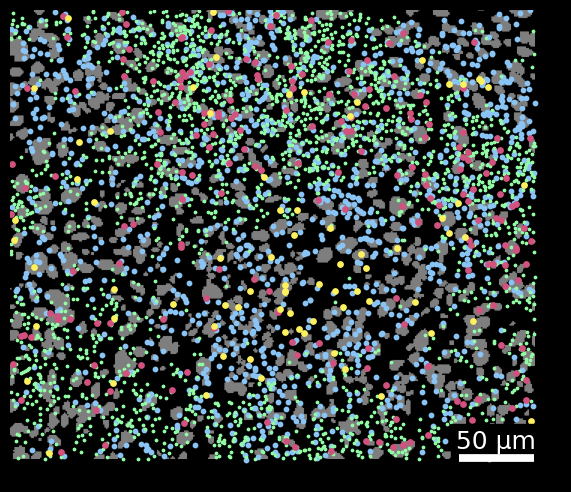

In [8]:
xlim = (9850, 10200)
ylim = (5000, 5300)

v =  [[xlim[0], ylim[0]],[xlim[1],ylim[1]]]

scale_factor = 1#0.27*4.5
img_zoom = img_d[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]

sizes = [10, 3, 15, 15] 
genes = ['COL1A1', 'GFAP', 'VEGFA', 'RGCC']
DS.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=400,
    show_axes=False,
    show_legend=False,
    view = v,
    image=img_zoom,
    reset_xy=True,
    save=True,
    save_name='figures/GS_dots.svg'
)